# Python for Machine Learning

### *Session \#2*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review and Yellowbrick Basics

### Warm Ups

*Type the given code into the cell below*

---

In [20]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from yellowbrick.features import rank2d
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import LearningCurve, ValidationCurve

df = pd.read_csv("diamonds.csv")

**Prepare datasets**
```python
X = df.drop('price', 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

In [4]:
X = df.drop('price', 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Split pipeline between numeric/categorical**: 
```python
numeric = ['x', 'y', 'z', 'carat', 'table', 'depth']
categorical = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ])
preprocessor.fit(X)
```

In [21]:
numeric = ['x', 'y', 'z', 'carat', 'table', 'depth']
categorical = ['cut', 'color', 'clarity']

encoder = OneHotEncoder()
encoder.fit(X)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', encoder, categorical)
    ])

model = make_pipeline(preprocessor, LinearRegression())

**Visualize correlation matrix:** `rank2d(X[numeric])`

**Add yellowbrick visualizer and train model:** 
```
model = make_pipeline(preprocessor, LinearRegression())
model = ResidualsPlot(model)
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof() 
```

0.9202694695220119

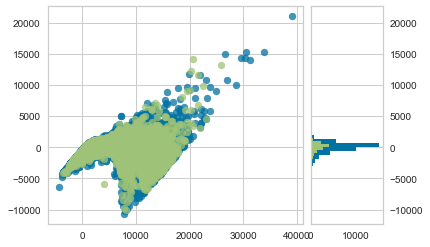

In [12]:
model = make_pipeline(preprocessor, ResidualsPlot(LinearRegression()))
model.fit(X_train, y_train)
model.score(X_test, y_test)

### Exercises
---

**1. Separate the dataframe into** `X_train`, `y_train`, `X_test`, `y_test`

**Use** `rank2d` **to determine which features are correlated with each other** 

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d4d8c50>,
       colormap='RdBu_r', features=None, show_feature_names=None)

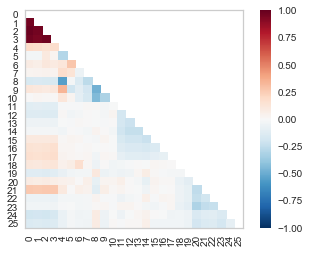

In [45]:
from sklearn.compose import make_column_transformer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

preprocessor = make_column_transformer(
                 (StandardScaler(), numeric),
                 (OneHotEncoder(), categorical))

rank2d(preprocessor.fit_transform(X_train))

**2. Use a ColumnTransformer to create a model with both** `OneHotEncoder()` **and** `StandardScaler()` **preprocessing for the appropriate columns.**

0.91775677021103

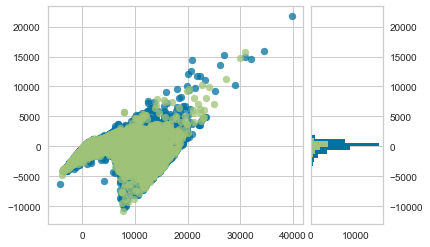

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ])

model = make_pipeline(preprocessor, ResidualsPlot(LinearRegression()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**3. Add a ResidualsPlot visualizer to the model, and fit to** `X_train`. **What target values does the model have the most difficulty with?**

**4. Rerun the above code, but add a PredictionError visualizer to the model instead. Is the variance consistent across values of** `y`? 

0.91775677021103

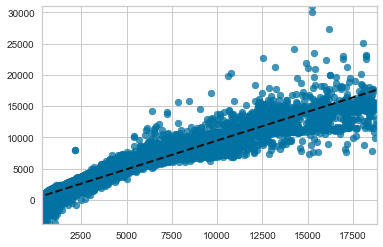

In [38]:
model = make_pipeline(preprocessor, PredictionError(LinearRegression()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**5. Rerun the above code, but add a Learning Curve visualizer to the model instead. This time, do NOT call** `.score()` **Is the variance consistent across values of y?**

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['x', 'y', 'z', 'carat',
                                                   'table', 'depth']),
                                                 ('cat',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
           

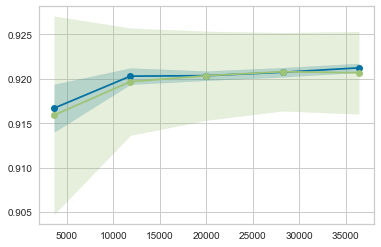

In [43]:
model = make_pipeline(preprocessor, 
                      LearningCurve(LinearRegression(), cv=10))

model.fit(X_train, y_train)

## II. Bias, Variance and Polynomial Regression

### Warm Ups

*Type the given code into the cell below*

---

**Add polynomial features to model:**
```python
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X[['carat']], y)

```

**Predict and plot using model** 
```python
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X[['carat']], y)
plt.scatter(X[['carat']], model.predict(X[['carat']]))
```

**Use a validation curve to test different polynomial degrees**
```python
model = make_pipeline(PolynomialFeatures(), LinearRegression())
model = ValidationCurve(model, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 5))

model.fit(X[['carat']], y)
```

### Exercises
---

**1. Train a polynomial regression model using all the numeric columns** 

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
X = df[numeric]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(PolynomialFeatures(3), LinearRegression())

model.fit(X_train, y_train)
model.score(X_test, y_test)
# mean_absolute_error(model.predict(X_test), y_test)

0.8430720287458802

**2. Use a validation curve to test polynomial degrees up to 5**

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f200ba8>,
                cv=10, groups=None, logx=False, model=None, n_jobs=1,
                param_name='polynomialfeatures__degree',
                param_range=array([1, 2]), pre_dispatch='all', scoring=None)

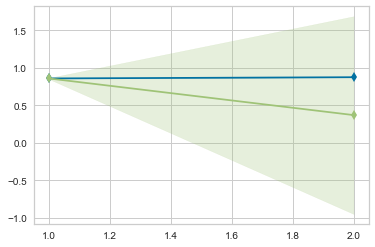

In [90]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())
model = ValidationCurve(model, 
                        param_name='polynomialfeatures__degree', 
                        param_range=range(1, 3), cv=10)

model.fit(X_train, y_train)

**3. At what degree does the model start to drastically overfit?**

## III. Regularization

### Warm Ups

*Type the given code into the cell below*

---
**Train a ridge regression model:**
```python
model = make_pipeline(preprocessor, Ridge(alpha=1))
```

**Train a lasso regression model:**
```python
model = make_pipeline(preprocessor, Lasso(alpha=1))
```

**Get coefficients from classifier in Pipeline:** `model.named_steps.lasso.coef_`

### Exercises
---

**1. Train a Ridge Regression model on the entire diamond dataset, as in exercise set 1. What where is the sweet spot for the alpha parameter?** 

In [127]:
X = df.drop("price", axis='columns')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

for i in numpy.arange(1, 50, 1):
    scores = []
    for n in range(10):
        model = make_pipeline(preprocessor, Ridge(alpha=i))
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print(f"ALPHA: {i} AVG R2 SCORE: {numpy.mean(scores)}")

ALPHA: 1 AVG R2 SCORE: 0.9154246350849606
ALPHA: 2 AVG R2 SCORE: 0.9154230278976492
ALPHA: 3 AVG R2 SCORE: 0.9154212674143057
ALPHA: 4 AVG R2 SCORE: 0.91541935496265
ALPHA: 5 AVG R2 SCORE: 0.915417291857682
ALPHA: 6 AVG R2 SCORE: 0.9154150794018191
ALPHA: 7 AVG R2 SCORE: 0.9154127188850392
ALPHA: 8 AVG R2 SCORE: 0.9154102115850146
ALPHA: 9 AVG R2 SCORE: 0.9154075587672483
ALPHA: 10 AVG R2 SCORE: 0.9154047616852091
ALPHA: 11 AVG R2 SCORE: 0.915401821580461
ALPHA: 12 AVG R2 SCORE: 0.9153987396827954
ALPHA: 13 AVG R2 SCORE: 0.9153955172103597
ALPHA: 14 AVG R2 SCORE: 0.915392155369784
ALPHA: 15 AVG R2 SCORE: 0.9153886553563065
ALPHA: 16 AVG R2 SCORE: 0.9153850183538983
ALPHA: 17 AVG R2 SCORE: 0.9153812455353851
ALPHA: 18 AVG R2 SCORE: 0.9153773380625674
ALPHA: 19 AVG R2 SCORE: 0.9153732970863422
ALPHA: 20 AVG R2 SCORE: 0.9153691237468188
ALPHA: 21 AVG R2 SCORE: 0.9153648191734366
ALPHA: 22 AVG R2 SCORE: 0.9153603844850788
ALPHA: 23 AVG R2 SCORE: 0.9153558207901883
ALPHA: 24 AVG R2 SCORE: 0

**2. Access the coefficients from the trained Ridge model** 

In [114]:
import numpy

model.named_steps.ridge.coef_

array([-1.033550109730940e+03, -4.074806802625067e+00,
       -4.537730852056640e+01,  5.253505248922797e+03,
       -6.445313069134519e+01, -9.281830516706719e+01,
       -5.650102044787113e+02, -7.653503116545460e+00,
        2.519229755786204e+02,  1.804734037375568e+02,
        1.402673282546681e+02,  8.157973592170650e+02,
        6.181099325504085e+02,  5.567768117237789e+02,
        3.501963007555661e+02, -1.627434745186587e+02,
       -6.333107552768804e+02, -1.544826174441581e+03,
       -3.806893930437666e+03,  1.500815277713755e+03,
       -1.560721235219348e+02, -1.110011978932609e+03,
        7.560829561609924e+02,  4.641105090714978e+02,
        1.207325563465103e+03,  1.144643726505119e+03])

**3. Train a Lasso Regression model on the entire diamond dataset, as in exercise set 1. What where is the sweet spot for the alpha parameter?** 

In [120]:
model = make_pipeline(preprocessor, Lasso(alpha=1))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9180122571566651

**4. Access the coefficients from the trained Lasso model** 

In [121]:
model.named_steps.lasso.coef_

array([ -533.7620098473172  ,    -0.               ,
         -45.204973909102826,  4655.696487686265   ,
         -88.72769409474311 ,  -107.42673505898485 ,
        -322.4784454853205  ,    -0.               ,
          89.69917649130275 ,     0.               ,
           0.               ,   276.36774593101046 ,
         130.92741279757618 ,    83.52658580633398 ,
           0.               ,  -432.8324567417247  ,
        -821.1616142619572  , -1593.1718775556365  ,
       -3389.7421750005283  ,   541.1025203579528  ,
        -628.8499676236543  , -1508.2622119049445  ,
         116.20539461384006 ,    -0.               ,
         479.5001998218655  ,   478.30405015140013 ])